In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/sample_data/diabetes.csv')
###Acessing data: dataset.column
###List of columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes PedigreeFunction, Age, Outcome.

In [25]:
###Copying data and cleaning it - removes all "0" values from data where thee shouldn't be any
### .deepcopy() creates new object and does real copying of original object to new one. Changing new deepcopied object doesn't affect original object.
data_copy = data.copy(deep = True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [26]:
###Random forest can't accept NaN as value, so all NaN values are replaced with the mean of the remaining values for each relevant attribute.
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

In [27]:

print(data_copy) ##Used to check if the data is imported correctly

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [28]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [29]:
#Get Target data
y = data_copy['Outcome']
#Load X Variables into a Pandas Dataframe with columns
X = data_copy.drop(['Outcome'], axis = 1)


In [32]:
### Shows us X and Y of data. X = Rows, Y = Columns
print(f'X: {X.shape}')

X: (768, 8)


In [41]:
from sklearn.model_selection import train_test_split
### random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (614, 8)
y_train : (614,)
X_test : (154, 8)
y_test : (154,)


In [44]:
ResultForest = 0
NumTimes = 200


for i in list(range(NumTimes)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

  rf_Model = RandomForestClassifier(oob_score=True)

  rf_Model.fit(X_train,  y_train)

  ResultForest += rf_Model.oob_score_


print(ResultForest/NumTimes)

0.7424183006535947


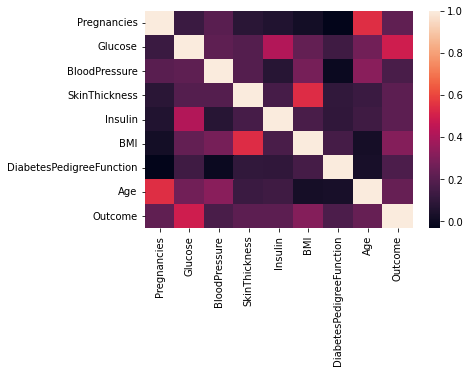

In [45]:
sns.heatmap(data_copy.corr())



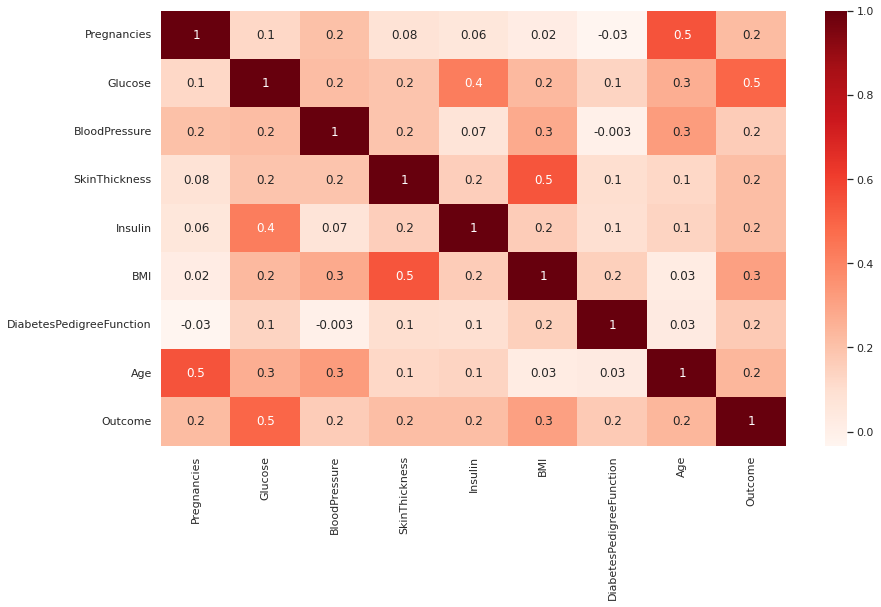

In [47]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = data_copy.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Reds", fmt='.1g')